In [1]:
import \
    flexpart_management.notebooks.sulfate_volcano_chc.n01_volcano_sulfate_lfc\
    as lfc

#local functions and constants
from flexpart_management.notebooks.sulfate_volcano_chc.n01_volcano_sulfate_lfc import \
    plot_nnls_results, non_negative_least_square_solver, import_merged_data

from useful_scit.imps import *
import flexpart_management.modules.constants as co
import flexpart_management.modules.flx_array as fa

plt,lfc,co,fa;

reload


Loading BokehJS ...

In [2]:
def main():
    # %%
    sulf = 'Sulfate'
    clus_cols, ts_merged = import_merged_data(sulf)
    # %%
    res_df,ls_sum, ls = non_negative_least_square_solver(clus_cols, sulf, ts_merged)
    # %%
    plot_nnls_results(res_df)
    # %%
    f, ax = plt.subplots()
    # plt.show()
    res = (ts_merged[clus_cols]*ls).T.sum()
    # res = (ts_merged[clus_cols]*ls)
    sr_ = ['04_MR']
    res = (ts_merged[clus_cols]*ls)[sr_]*10
    res.resample('1H').median().plot.area(ax=ax)
    ax.figure.tight_layout()
    ts_merged[sulf].resample('1H').median().plot(ax=ax,color='k')
    ax.set_ylim(.05,10)
    ax.set_yscale('linear')
    ax.figure.show()
    # %%


    res.sum().plot.barh()
    plt.show()

    # %%
    # cc:pd.DataFrame = ts_merged[clus_cols]

    cr = ts_merged.corr()
    # %%
    f, ax = plt.subplots(figsize=(20,20),dpi=300)

    sns.heatmap(data=cr,annot=True,ax=ax,cmap='bwr',vmin=-1,vmax=1)
    
    f:plt.Figure
    f.savefig('/tmp/pdf.pdf')

    plt.show()

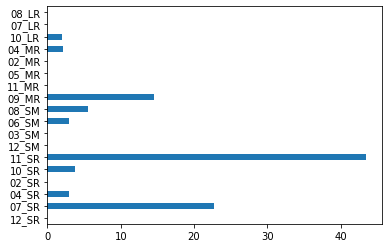

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


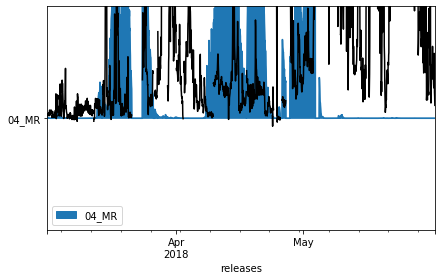

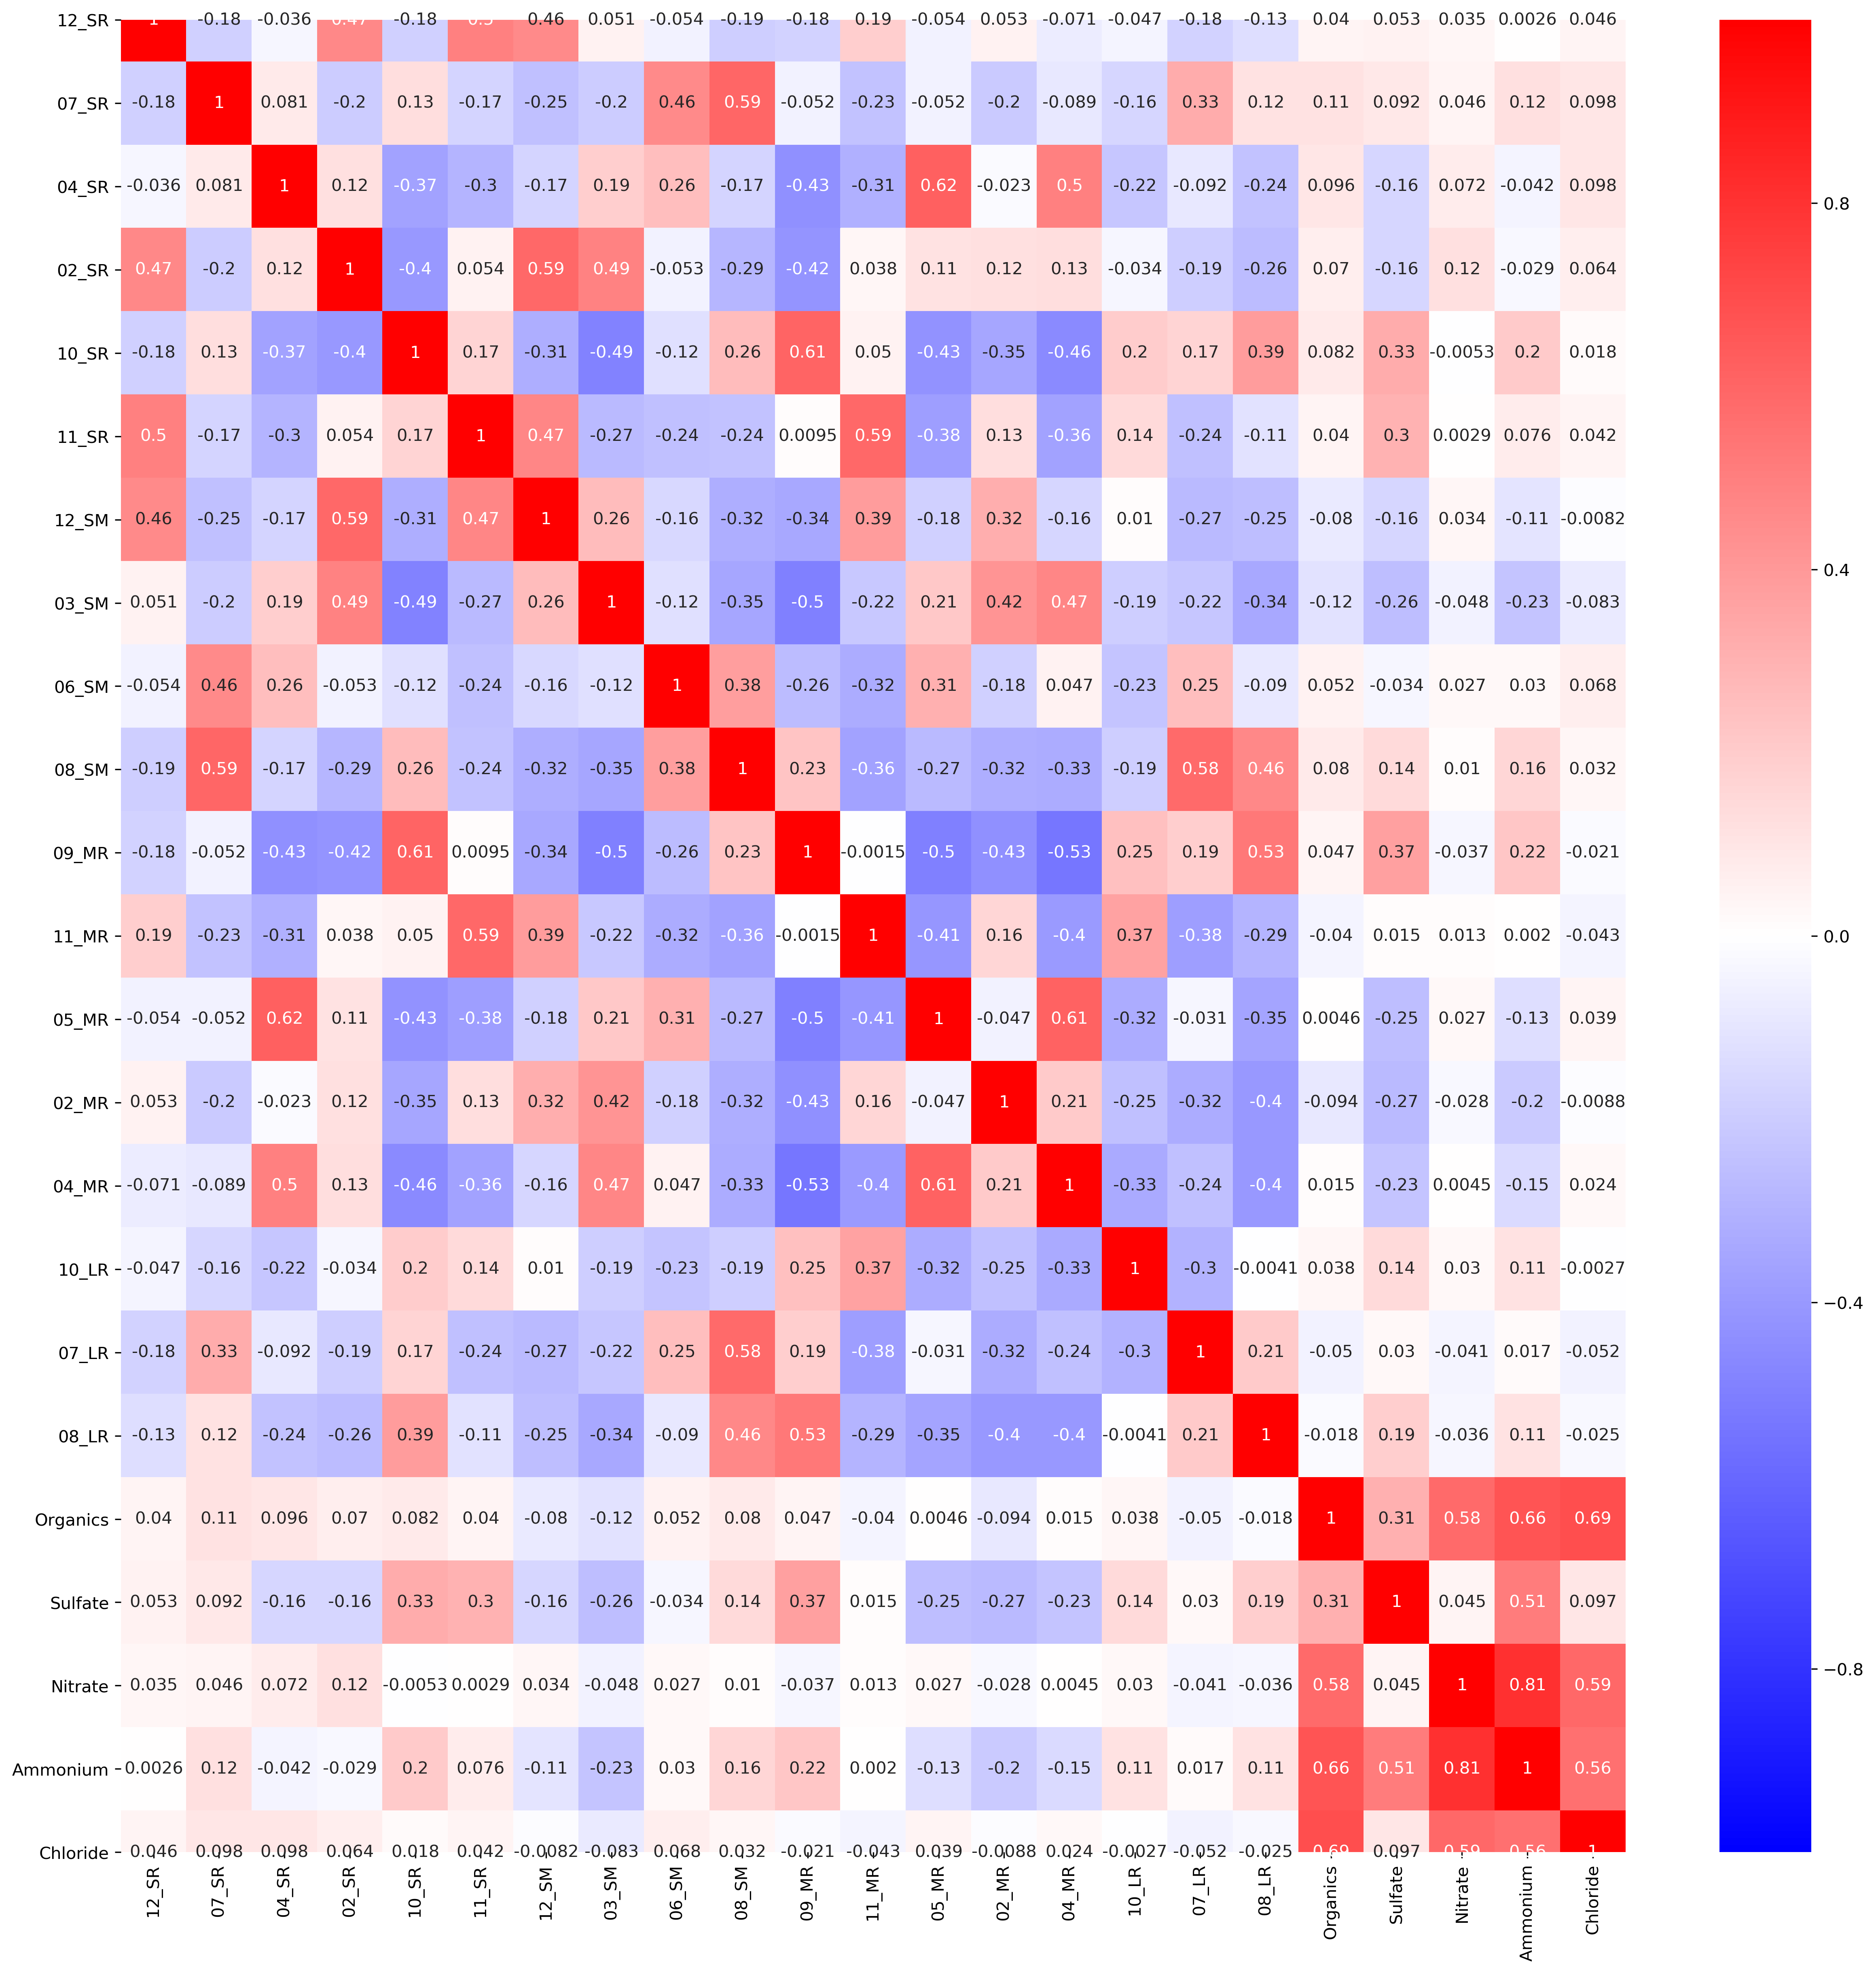

In [3]:
main()